# Clustering

In [2]:
from utils.utils import get_input_matrix
from models.dimensionality_reduction import SVD
from models.matrix_factorization import ALS
import numpy as np

In [3]:
X, W = get_input_matrix()

In [4]:
# model = ALS(1, 10000, 1000, 3, verbose=1)
# pred = model.fit_transform(X, None, W)
# with open('als_pred.npy', 'wb') as f:
#     np.save(f, pred)

with open('als_pred.npy', 'rb') as f:
    pred = np.load(f)

In [5]:
pred = np.clip(pred, 1, 5)

In [6]:
from sklearn.decomposition import NMF
model = NMF(n_components=7, init='nndsvd', max_iter=1024, random_state=1,)
W = model.fit_transform(pred)
H = model.components_

/opt/homebrew/Caskroom/miniforge/base/envs/cil/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 1024 reached. Increase it to improve convergence.
  warnings.warn(


### User clustering

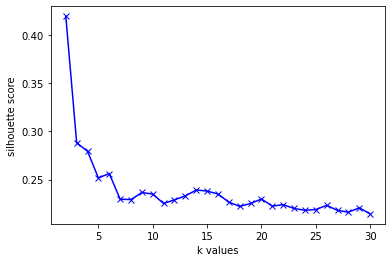

In [24]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

clusters = range(2, 31)
silhouette_avg = []

for c in clusters:
    # initialise kmeans
    model = KMeans(n_clusters=c, max_iter=600)
    model.fit(W)
    cluster_labels = model.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(W, cluster_labels))
    
plt.plot(clusters, silhouette_avg, "bx-")
plt.xlabel("k values") 
plt.ylabel("silhouette score") 
plt.show()

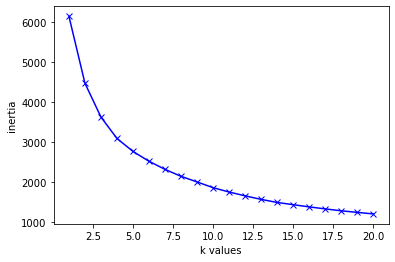

In [25]:
ssd = []
K = range(1,21)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(W)
    ssd.append(kmeans.inertia_)
plt.plot(K, ssd, "bx-")
plt.xlabel("k values") 
plt.ylabel("inertia") 
plt.show()

### Movies clustering

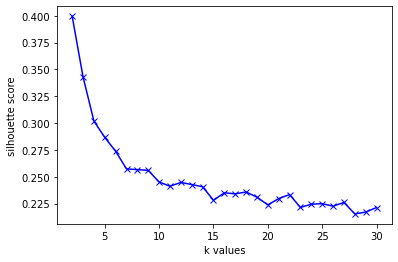

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

clusters = range(2, 31)
silhouette_avg = []

for c in clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=c, max_iter=600)
    kmeans.fit(H.T)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(H.T, cluster_labels))
    
plt.plot(clusters, silhouette_avg, "bx-")
plt.xlabel("k values") 
plt.ylabel("silhouette score") 
plt.show()

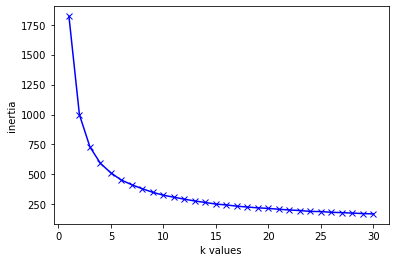

In [9]:
ssd = []
K = range(1,31)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(H.T)
    ssd.append(kmeans.inertia_)
plt.plot(K, ssd, "bx-")
plt.xlabel("k values") 
plt.ylabel("inertia") 
plt.show()